## 0. general python imports

In [ ]:
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

%matplotlib inline
set_matplotlib_formats('svg')

## 1. data loading / generation

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=2, n_clusters_per_class=1, n_samples=5000)

plt.figure(figsize=(8, 6))
plt.scatter(x = X[:,0], y = X[:,1], c=y, marker='x', zorder=2)
plt.grid()

## 2. decision trees

__pros__:
* simple models, can be visualized
* no need for extensive data preprocessing (ohe, etc.)
* computationally efficient

__cons__:
* sensitive to small variations in input data
* sensitive to highly imbalanced data

__training algorithms__:

* ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

* C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

* C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.

* __CART__ (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=128, criterion='entropy', min_samples_leaf=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=128,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
def plot_decision_boundary(X, y, trained_model):
    
    """
    plots a decision boundary for an already trained model
    """
    
    plt.figure(figsize=(4, 4))
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    
    if hasattr(trained_model, 'decision_function'):
       # distance to the hyperplane
       Z = trained_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
       # probability of belonging to the defined classes (0, 1)
       Z = trained_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], 
                c=y,
                cmap=ListedColormap(['#FF0000', '#0000FF']),
                edgecolors='k')
    
    plt.title('decision boundary')
    plt.text(xx.max() - .3, 
             yy.min() + .3, 
             (f'Score: {trained_model.score(X, y):.2f}').lstrip('0'),
             size=10, horizontalalignment='right')

In [24]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded unt

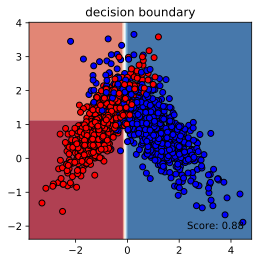

In [25]:
plot_decision_boundary(X_test, y_test, model)

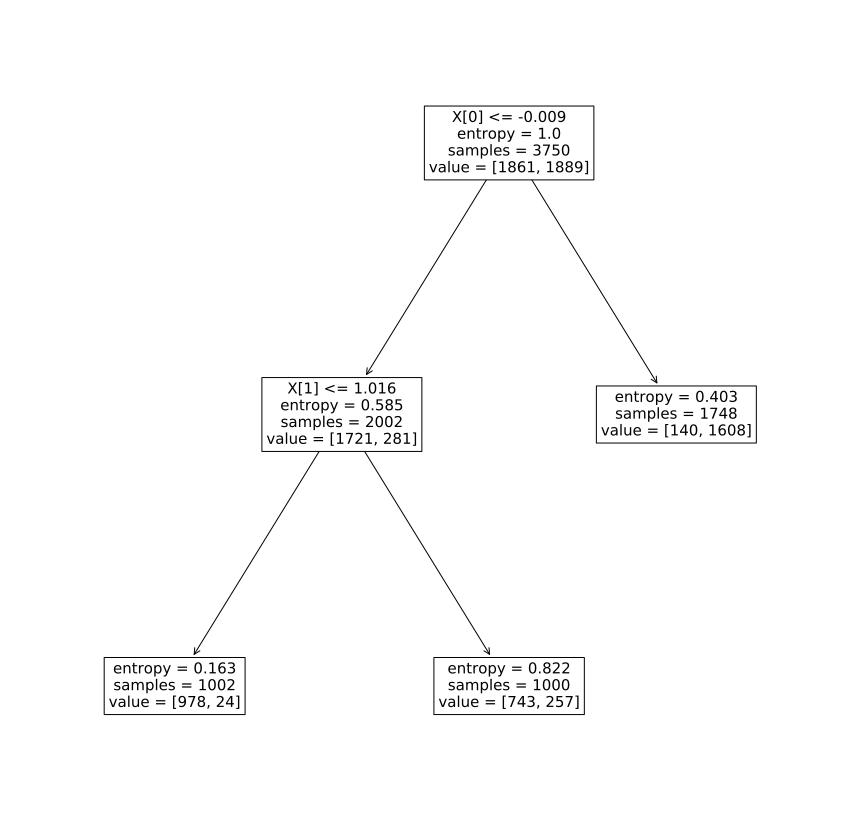

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(model, fontsize=15);

## 3. ensemble models

combining multiple models to improve overall performance.

### 3.1 basic techniques

#### voting, averaging, weighted averaging

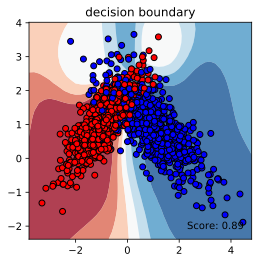

In [28]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

clf1 = SVC(gamma='auto', probability=True)
clf2 = LogisticRegression(solver='lbfgs')

ensemble = VotingClassifier(estimators=[('lr', clf2), ('svc', clf1)], voting='soft')
ensemble.fit(X_train, y_train);

plot_decision_boundary(X_test, y_test, ensemble)

### 3.2 advanced techniques

#### 3.2.1 stacking, blending

see classroom examples and explanation. Very common in Kaggle competitions.

#### bagging

train a series of weak learners over a subset of data and average predictions. For Decision Trees, it is called Random Forest (but works virtually for any algorithm)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. v

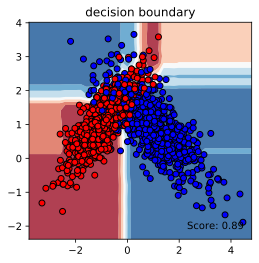

In [36]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)

Another variant with DT, ExtraTrees.

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

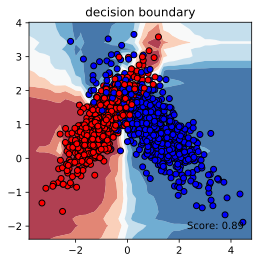

In [33]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)

In [37]:
from lightgbm import LGBMClassifier

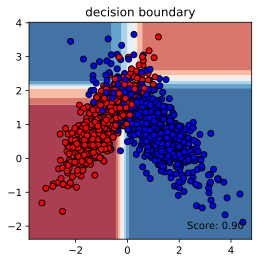

In [38]:
model = LGBMClassifier(boosting_type='rf', 
                       bagging_freq=1, 
                       bagging_fraction = 0.9, 
                       n_estimators=100)

model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)

#### boosting

train a series of weak learners sequentially, trying to focus on correcting 'mistakes' of previous learners.

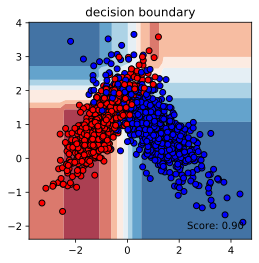

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)

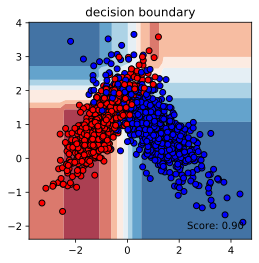

In [40]:
from sklearn.ensemble import AdaBoostClassifier
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)

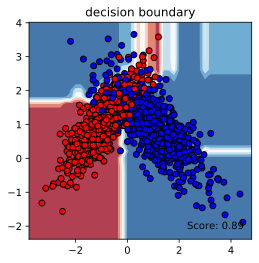

In [41]:
model = LGBMClassifier()

model.fit(X_train, y_train)
plot_decision_boundary(X_test, y_test, model)